In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.font_manager as fm    # 한글폰트
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

import matplotlib as mpl  
mpl.rcParams["axes.unicode_minus"] = False

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split

# 1. 자주쓰는 키워드 확인


## 성사된 프로젝트


### 인트로(description)

In [2]:
# 성사된 프로젝트

df = pd.read_csv("data/Byeonghap_final4.csv", index_col = 0)
df

,title,category,description,current_funding_amount,percentage,target_funding_amount,supporter
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰 리소스,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,49651500,4965,500000,1659
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,웹툰 · 만화,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,347353000,267,500000,1712
2,꼬마마법사 레미 공식 한정판 굿즈,영화 · 비디오,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,74329000,247,500000,979
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,출판,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,12830500,366,500000,471
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",홈 · 리빙,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,7777000,777,500000,298
...,...,...,...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1730000,173,10000,27
9591,카프카 <변신> 초판본과 독서카드,출판,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1730000,173,10000,114
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1730000,173,10000,54
9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.,865000,173,5000,45


In [3]:
# 인덱스 순서대로 다시 설정

index = [i for i in range(len(df))]
index

df["index"] = index

In [4]:
df = df.set_index("index")
df

,title,category,description,current_funding_amount,percentage,target_funding_amount,supporter
index,,,,,,,
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰 리소스,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,49651500,4965,500000,1659
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,웹툰 · 만화,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,347353000,267,500000,1712
2,꼬마마법사 레미 공식 한정판 굿즈,영화 · 비디오,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,74329000,247,500000,979
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,출판,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,12830500,366,500000,471
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",홈 · 리빙,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,7777000,777,500000,298
...,...,...,...,...,...,...,...
9556,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1730000,173,10000,27
9557,카프카 <변신> 초판본과 독서카드,출판,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1730000,173,10000,114
9558,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1730000,173,10000,54


In [5]:
# 결과 컬럼 추가 : 성사 - 1 , 실패 - 0

df["result"] = 3   # 아무값이나 해서 컬럼 생성

for i in range(len(df["percentage"])):
    if df["percentage"][i] >= 100:
        df["result"][i] = 1
    else: 
        df["result"][i] = 0

In [6]:
df

,title,category,description,current_funding_amount,percentage,target_funding_amount,supporter,result
index,,,,,,,,
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰 리소스,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,49651500,4965,500000,1659,1
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,웹툰 · 만화,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,347353000,267,500000,1712,1
2,꼬마마법사 레미 공식 한정판 굿즈,영화 · 비디오,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,74329000,247,500000,979,1
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,출판,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,12830500,366,500000,471,1
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",홈 · 리빙,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,7777000,777,500000,298,1
...,...,...,...,...,...,...,...,...
9556,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1730000,173,10000,27,1
9557,카프카 <변신> 초판본과 독서카드,출판,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1730000,173,10000,114,1
9558,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1730000,173,10000,54,1


In [110]:
intro = df["description"]

intro_text = ",".join(intro)
type(intro_text)
intro_text

'웹툰과 일러스트에 사용할수있는 꽃소재입니다.,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,방영 20주년 기념 \'꼬마마법사 레미\' 공식 한정판 굿즈를 소개합니다!,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트> 단행본,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,파댕이가 돌아와따 ! 모찌 흑우 파댕이의 입양자가 되어주세요!,내가 가지고 있는 일상복과도 매치하기 쉬운 한복, 나봄 저고리 셔츠&허리치마,다양한 디자인으로 구성된 평민들의 거리를 제작하였습니다.,죽음을 연습하는 질문 200개가 수록된 질문집,로맨스판타지 작품에 도움이 될만한 엑스트라의 활용도를 더 높여 돌아왔습니다!,친구를 찾아 어두운 폐병원을 헤매는 공포 게임... 과연 설화는 친구를 찾을 수 있을까..,팀 Artist Ability Family의 첫번째 텀블벅 프로젝트.\n<마법의 숲 도서관>,1888년에 발표된 오스카 와일드의 <행복한 왕자> 초판을 복원하려고요!!!,성폭력 피해 직후부터 재판에 이르기까지의 과정 동안 어떻게 대응해야 할지를 알려드립니다.,100가지 종류의 다양한 문양 장식들을 준비 중 입니다. ,지갑송 작가 퓨전 판타지 장편소설, 소설 속 엑스트라 하드커버 애장판,일상의 기록만 해도 라인이 살아나는 습관,지킬 잉크에 약물을 주사하면 하이드 잉크로 변신하는 만년필/드로잉 잉크 <지킬 투 하이드>,목격자 진술을 바탕으로 연쇄 살인마의 사건을 추리하세요.,물과 햇빛 그리고 선인장으로 진짜 환경을 생각하는 패션, 가치백을 소개합니다.,작가의 메모를 이미지화 시킨 포스터만화책 출간 프로젝트입니다.,대만 그림여행에서 만난 타이페이식물원. 그곳을 산책하며 남긴 드로잉을 모아 독립출판합니다.,조선시대부터 길몽과 흉몽을 거래해온 평창동 꿈집! 그 신비롭고 애틋한 이야기를 풀어봅니다.,공감과 마음챙김 명상의 기초를 위한 시각적 자료, 감정카드입니다.,저희가 만든 동화같은 작고 아름다운 공간, 한 번

In [224]:
f = open("C:/anaconda3/Lib/site-packages/konlpy/data/corpus/kolaw/tumblbug_description.txt", "w", encoding = "utf-8")
f.write(str(intro_text))
f.close()

In [227]:
# C:\anaconda3\Lib\site-packages\konlpy\data\corpus\kolaw 경로에 있는 텍스트 파일만 읽어들일 수 있다.

intro_ko_text = kolaw.open("tumblbug_description.txt").read()
intro_ko_text

'웹툰과 일러스트에 사용할수있는 꽃소재입니다.,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,방영 20주년 기념 \'꼬마마법사 레미\' 공식 한정판 굿즈를 소개합니다!,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트> 단행본,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,파댕이가 돌아와따 ! 모찌 흑우 파댕이의 입양자가 되어주세요!,내가 가지고 있는 일상복과도 매치하기 쉬운 한복, 나봄 저고리 셔츠&허리치마,다양한 디자인으로 구성된 평민들의 거리를 제작하였습니다.,죽음을 연습하는 질문 200개가 수록된 질문집,로맨스판타지 작품에 도움이 될만한 엑스트라의 활용도를 더 높여 돌아왔습니다!,친구를 찾아 어두운 폐병원을 헤매는 공포 게임... 과연 설화는 친구를 찾을 수 있을까..,팀 Artist Ability Family의 첫번째 텀블벅 프로젝트.\n<마법의 숲 도서관>,1888년에 발표된 오스카 와일드의 <행복한 왕자> 초판을 복원하려고요!!!,성폭력 피해 직후부터 재판에 이르기까지의 과정 동안 어떻게 대응해야 할지를 알려드립니다.,100가지 종류의 다양한 문양 장식들을 준비 중 입니다. ,지갑송 작가 퓨전 판타지 장편소설, 소설 속 엑스트라 하드커버 애장판,일상의 기록만 해도 라인이 살아나는 습관,지킬 잉크에 약물을 주사하면 하이드 잉크로 변신하는 만년필/드로잉 잉크 <지킬 투 하이드>,목격자 진술을 바탕으로 연쇄 살인마의 사건을 추리하세요.,물과 햇빛 그리고 선인장으로 진짜 환경을 생각하는 패션, 가치백을 소개합니다.,작가의 메모를 이미지화 시킨 포스터만화책 출간 프로젝트입니다.,대만 그림여행에서 만난 타이페이식물원. 그곳을 산책하며 남긴 드로잉을 모아 독립출판합니다.,조선시대부터 길몽과 흉몽을 거래해온 평창동 꿈집! 그 신비롭고 애틋한 이야기를 풀어봅니다.,공감과 마음챙김 명상의 기초를 위한 시각적 자료, 감정카드입니다.,저희가 만든 동화같은 작고 아름다운 공간, 한 번

#### 품사별 많이 쓰인 단어

In [228]:
# 형태소 분석 및 품사 태깅

okt = Okt()
intro_token_pos = okt.pos(intro_ko_text, stem=True)        # 글자 원형으로 바꿔주기, stem=True
intro_token_pos

[('웹툰', 'Noun'),
 ('과', 'Josa'),
 ('일러스트', 'Noun'),
 ('에', 'Josa'),
 ('사용', 'Noun'),
 ('하다', 'Verb'),
 ('꽃', 'Noun'),
 ('소재', 'Noun'),
 ('이다', 'Adjective'),
 ('.,', 'Punctuation'),
 ('많다', 'Adjective'),
 ('사랑', 'Noun'),
 ('을', 'Josa'),
 ('받다', 'Verb'),
 ('네이버웹툰', 'Noun'),
 ('<', 'Punctuation'),
 ('고래', 'Noun'),
 ('별', 'Noun'),
 ('>', 'Punctuation'),
 ('오디오', 'Noun'),
 ('웹툰', 'Noun'),
 ('펀딩', 'Noun'),
 ('이', 'Josa'),
 ('시즌', 'Noun'),
 ('2', 'Number'),
 ('로', 'Noun'),
 ('돌아오다', 'Verb'),
 ('!,', 'Punctuation'),
 ('방영', 'Noun'),
 ('20', 'Number'),
 ('주년', 'Noun'),
 ('기념', 'Noun'),
 ("'", 'Punctuation'),
 ('꼬마', 'Noun'),
 ('마법사', 'Noun'),
 ('레미', 'Noun'),
 ("'", 'Punctuation'),
 ('공식', 'Noun'),
 ('한정판', 'Noun'),
 ('굿', 'Noun'),
 ('즈', 'Modifier'),
 ('를', 'Noun'),
 ('소개', 'Noun'),
 ('하다', 'Verb'),
 ('!,', 'Punctuation'),
 ('1억', 'Number'),
 ('1천', 'Number'),
 ('400만원', 'Number'),
 ('을', 'Foreign'),
 ('모으다', 'Verb'),
 ('!', 'Punctuation'),
 ('노동', 'Noun'),
 ('탈출', 'Noun'),
 ('금융', 'Noun'),
 (

In [229]:
# 워드 카운팅
ko = nltk.Text(intro_token_pos)
intro_token_pos2 = ko.vocab().most_common(1000)        # 가장 많이 등장한 단어 1000개까지만 사용, 각각 등장한 갯수 카운팅
intro_token_pos2

[((',', 'Punctuation'), 6386),
 (('을', 'Josa'), 5137),
 (('의', 'Josa'), 4487),
 (('.,', 'Punctuation'), 4313),
 (('하다', 'Verb'), 4116),
 (('를', 'Josa'), 2739),
 (('이다', 'Adjective'), 2400),
 (('에', 'Josa'), 1730),
 (('한', 'Josa'), 1636),
 (("'", 'Punctuation'), 1634),
 (('들', 'Suffix'), 1538),
 (('이', 'Josa'), 1390),
 (('으로', 'Josa'), 1348),
 (('.', 'Punctuation'), 1347),
 (('과', 'Josa'), 1245),
 (('있다', 'Adjective'), 1069),
 (('로', 'Josa'), 1063),
 (('프로젝트', 'Noun'), 1010),
 (('와', 'Josa'), 994),
 (('!,', 'Punctuation'), 944),
 (('가', 'Josa'), 916),
 (('위', 'Noun'), 853),
 (('만들다', 'Verb'), 847),
 (('담다', 'Verb'), 785),
 (('!', 'Punctuation'), 747),
 (('<', 'Punctuation'), 744),
 (('에서', 'Josa'), 722),
 (('되다', 'Verb'), 701),
 (('제작', 'Noun'), 685),
 (('수', 'Noun'), 673),
 (('>', 'Punctuation'), 667),
 (('보다', 'Verb'), 637),
 (('웹툰', 'Noun'), 527),
 (('이야기', 'Noun'), 462),
 (('함께', 'Adverb'), 455),
 (('적', 'Suffix'), 441),
 (('인', 'Josa'), 439),
 (('는', 'Josa'), 417),
 (('배경', 'Noun')

In [232]:
intro_ad = []

for i in intro_token_pos2:
    if i[0][1] == 'Adverb':
        intro_ad.append((i[0][0], i[1]))
    else: 
        pass   


intro_vb = []

for i in intro_token_pos2:
    if i[0][1] == 'Verb':
        intro_vb.append((i[0][0], i[1]))
    else: 
        pass


    
    
intro_nn = []

for i in intro_token_pos2:
    if i[0][1] == 'Noun':
        intro_nn.append((i[0][0], i[1]))
    else: 
        pass
    
    
intro_pc = []

for i in intro_token_pos2:
    if i[0][1] == 'Punctuation':
        intro_pc.append((i[0][0], i[1]))
    else: 
        pass    
    
    

print("형용사", intro_ad)
print("-"*130)
print("동사", intro_vb)
print("-"*130)
print("명사", intro_nn)
print("-"*130)
print("기호", intro_pc)

형용사 [('함께', 455), ('다', 95), ('풍', 83), ('없이', 53), ('많이', 29), ('같이', 27), ('어느', 27)]
----------------------------------------------------------------------------------------------------------------------------------
동사 [('하다', 4116), ('만들다', 847), ('담다', 785), ('되다', 701), ('보다', 637), ('만나다', 276), ('않다', 229), ('되어다', 213), ('싶다', 195), ('쉬다', 166), ('오다', 161), ('가다', 160), ('해보다', 155), ('해주다', 155), ('드리다', 153), ('들다', 145), ('추다', 139), ('즐기다', 138), ('내다', 131), ('선보이다', 127), ('받다', 118), ('담기다', 117), ('늘다', 116), ('그리다', 105), ('모으다', 103), ('크다', 97), ('돌아오다', 96), ('알다', 89), ('보내다', 88), ('매다', 82), ('맞다', 80), ('먹다', 80), ('자다', 77), ('이다', 76), ('찾다', 74), ('입다', 74), ('나르다', 72), ('쓰다', 70), ('느끼다', 67), ('바라다', 62), ('모이다', 62), ('지키다', 61), ('주다', 61), ('어울리다', 59), ('살다', 58), ('시키다', 56), ('쓸다', 55), ('타다', 55), ('나오다', 53), ('채우다', 51), ('만들어지다', 46), ('가지다', 46), ('배우다', 45), ('살아가다', 45), ('돕다', 45), ('떠나다', 44), ('모르다', 43), ('읽다', 43), ('빛나다', 43), ('써다', 4

#### 형용사

(-0.5, 399.5, 199.5, -0.5)

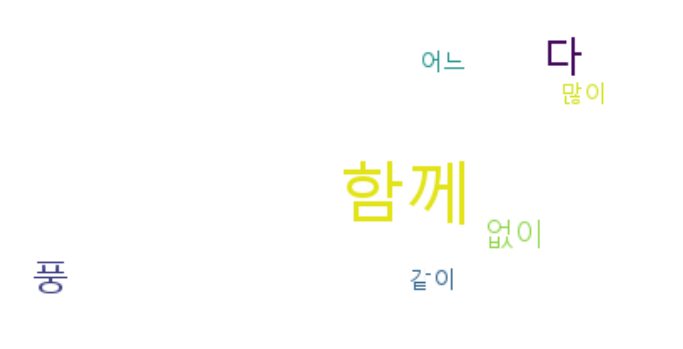

In [233]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(intro_ad))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 동사

(-0.5, 399.5, 199.5, -0.5)

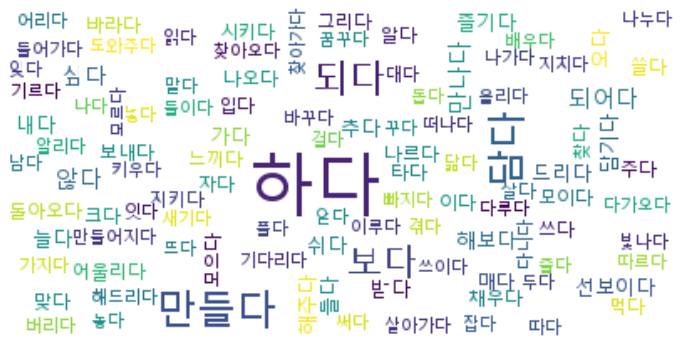

In [234]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(intro_vb))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 기호

(-0.5, 399.5, 199.5, -0.5)

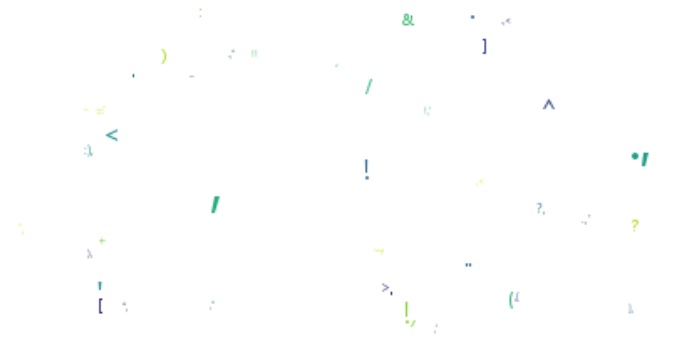

In [235]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(intro_pc))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 명사

In [113]:
# 형태소 분석, 명사만

okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko))

76922


In [114]:
# 불용어 처리
stop_words = ["제", "월", "일", "조", "때", "그", "이", "바", "및", "안", "정", "위", "관", "수", "프로젝트", "내", "종", "속", "를", "것", "의"]
token_ko = [word for word in token_ko if word not in stop_words] 


In [115]:
# 워드 카운팅
ko = nltk.Text(token_ko)
dir(ko)                           # 함수 검색
data = ko.vocab().most_common(50)        # 가장 많이 등장한 단어 50개까지, 각각 등장한 갯수 카운팅
data

[('제작', 685),
 ('웹툰', 527),
 ('이야기', 462),
 ('배경', 417),
 ('당신', 413),
 ('소개', 392),
 ('책', 341),
 ('우리', 323),
 ('스케치업', 317),
 ('집', 303),
 ('나', 277),
 ('일상', 276),
 ('디자인', 267),
 ('뱃지', 266),
 ('첫', 251),
 ('위해', 250),
 ('사용', 247),
 ('작가', 236),
 ('가지', 226),
 ('고양이', 222),
 ('일러스트', 219),
 ('세트', 215),
 ('여행', 213),
 ('선물', 213),
 ('마음', 212),
 ('한국', 212),
 ('북', 211),
 ('사랑', 208),
 ('여성', 203),
 ('사람', 202),
 ('더', 199),
 ('판타지', 174),
 ('굿', 172),
 ('준비', 172),
 ('향', 170),
 ('꽃', 168),
 ('기록', 166),
 ('그림', 165),
 ('세상', 165),
 ('향기', 162),
 ('달력', 160),
 ('게임', 156),
 ('후원', 156),
 ('기억', 153),
 ('향수', 149),
 ('시작', 145),
 ('모든', 139),
 ('대한', 133),
 ('시간', 133),
 ('커피', 133)]

(-0.5, 399.5, 199.5, -0.5)

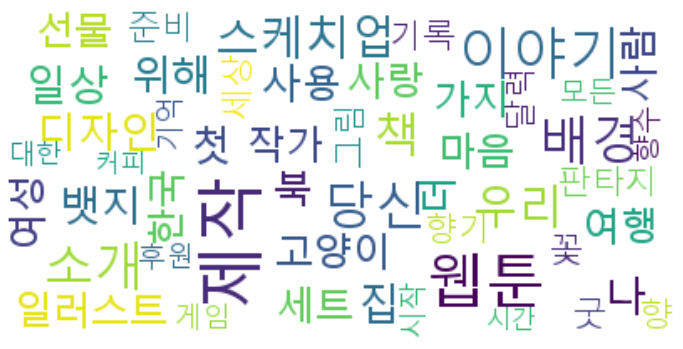

In [116]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

## 제목 (title)

In [117]:
title = df["title"]
title_text = ",".join(title)
type(title_text)
title_text

'웹툰과 일러스트를 위한 꽃브러쉬,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,꼬마마법사 레미 공식 한정판 굿즈,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,당신을 지켜주는 영물, \'메롱해치 자수 KIT\',파댕이가 돌아와따 ! [흑우 파댕이 인형],코디 걱정 없이 편하게, \'나봄 저고리 셔츠&허리치마\',[스케치업] 로판 일러스트를 위한 평민들의 거리,죽음을 연습하는 200가지 질문 -『질문의 죽음』,로맨스 판타지 웹툰에 도움이 되는 엑스트라 브러쉬,혼자하는 담력시험, 공포게임『Last Light』,[AAF] 50인의 아티스트가 해석한 <식물 합작 아트북>,오스카 와일드 <행복한 왕자> 1888년 초판 복원,변호사가 알려주는 성폭력 피해자를 위한 법률가이드,웹툰, 일러스트를 위한 100종류의 다양한 문양들,[지갑송 장편소설] <소설 속 엑스트라 큐브 편> 애장판,매일 3분 라인이 살아나는 습관,내 손으로 하이드를 깨우다, 지킬 투 하이드 잉크,목격자의 진술로 사건을 해결하는 추리 게임 [미제 사건],[CachiBag]물과 햇빛 그리고 선인장으로 빚은 가치백,시간을 담은 포스터 만화책 <MEMO> 출간,식물이 있는 우리, 타이페이식물원,길몽 팔아서 1억을 번다고요? 한국형 판타지 소설 <옥토>,우주만큼 복잡한 내 감정 찾기, 코스믹 마인드 오로라 카드,영롱한 펄과 함께 동화 속으로 초대할게요, 밀크웨이 입욕제,혹시 나도 탈모인가? 걱정한적 있다면! 헤막안티헤어로스샴푸,스케치업 해안마을과 소방차, 이삿짐차,지구 멸망을 앞둔 두 여자의 사랑 소설 <멸망의 감정>,66100 2020 브라렛,30종의 비인간 존재가 되어보는 <상괭이와 춤을> 키트,맥베스의 향기를 찾았다 <넵튠과 아포리아>,[RE:PLA] 쓰레기도 줄여주고 플라스틱 업사이클까지??,웹툰&일러스트에 활용하기 좋은 <헤일로(후광)>소재,나의 졸업을 막으려는 누군가가 있다? [공포의 조별과제],대체 불가한 독보적인 컬러의 아티스트 프롬 LP 발매,내년의 우린 좀 더 평안하고 행복하길 

In [118]:
f = open("C:/anaconda3/Lib/site-packages/konlpy/data/corpus/kolaw/tumblbug_title.txt", "w", encoding = "utf-8")
f.write(str(title_text))
f.close()

In [8]:
ko_text = kolaw.open("tumblbug_title.txt").read()
ko_text

'웹툰과 일러스트를 위한 꽃브러쉬,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,꼬마마법사 레미 공식 한정판 굿즈,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,당신을 지켜주는 영물, \'메롱해치 자수 KIT\',파댕이가 돌아와따 ! [흑우 파댕이 인형],코디 걱정 없이 편하게, \'나봄 저고리 셔츠&허리치마\',[스케치업] 로판 일러스트를 위한 평민들의 거리,죽음을 연습하는 200가지 질문 -『질문의 죽음』,로맨스 판타지 웹툰에 도움이 되는 엑스트라 브러쉬,혼자하는 담력시험, 공포게임『Last Light』,[AAF] 50인의 아티스트가 해석한 <식물 합작 아트북>,오스카 와일드 <행복한 왕자> 1888년 초판 복원,변호사가 알려주는 성폭력 피해자를 위한 법률가이드,웹툰, 일러스트를 위한 100종류의 다양한 문양들,[지갑송 장편소설] <소설 속 엑스트라 큐브 편> 애장판,매일 3분 라인이 살아나는 습관,내 손으로 하이드를 깨우다, 지킬 투 하이드 잉크,목격자의 진술로 사건을 해결하는 추리 게임 [미제 사건],[CachiBag]물과 햇빛 그리고 선인장으로 빚은 가치백,시간을 담은 포스터 만화책 <MEMO> 출간,식물이 있는 우리, 타이페이식물원,길몽 팔아서 1억을 번다고요? 한국형 판타지 소설 <옥토>,우주만큼 복잡한 내 감정 찾기, 코스믹 마인드 오로라 카드,영롱한 펄과 함께 동화 속으로 초대할게요, 밀크웨이 입욕제,혹시 나도 탈모인가? 걱정한적 있다면! 헤막안티헤어로스샴푸,스케치업 해안마을과 소방차, 이삿짐차,지구 멸망을 앞둔 두 여자의 사랑 소설 <멸망의 감정>,66100 2020 브라렛,30종의 비인간 존재가 되어보는 <상괭이와 춤을> 키트,맥베스의 향기를 찾았다 <넵튠과 아포리아>,[RE:PLA] 쓰레기도 줄여주고 플라스틱 업사이클까지??,웹툰&일러스트에 활용하기 좋은 <헤일로(후광)>소재,나의 졸업을 막으려는 누군가가 있다? [공포의 조별과제],대체 불가한 독보적인 컬러의 아티스트 프롬 LP 발매,내년의 우린 좀 더 평안하고 행복하길 

#### 품사별 많이 쓰인 단어

In [9]:
# 형태소 분석 및 품사 태깅

okt = Okt()
token_pos = okt.pos(ko_text, stem=True)        # 글자 원형으로 바꿔주기, stem=True
token_pos

[('웹툰', 'Noun'),
 ('과', 'Josa'),
 ('일러스트', 'Noun'),
 ('를', 'Josa'),
 ('위', 'Noun'),
 ('한', 'Josa'),
 ('꽃', 'Noun'),
 ('브러쉬', 'Noun'),
 (',', 'Punctuation'),
 ('오디오', 'Noun'),
 ('웹툰', 'Noun'),
 ('으로', 'Josa'),
 ('만나다', 'Verb'),
 ('<', 'Punctuation'),
 ('고래', 'Noun'),
 ('별', 'Noun'),
 ('_', 'Punctuation'),
 ('경성', 'Noun'),
 ('의', 'Josa'),
 ('인어공주', 'Noun'),
 ('>', 'Punctuation'),
 ('시즌', 'Noun'),
 ('2', 'Number'),
 (',', 'Punctuation'),
 ('꼬마', 'Noun'),
 ('마법사', 'Noun'),
 ('레미', 'Noun'),
 ('공식', 'Noun'),
 ('한정판', 'Noun'),
 ('굿', 'Noun'),
 ('즈', 'Modifier'),
 (',', 'Punctuation'),
 ('만화가', 'Noun'),
 ('의', 'Josa'),
 ('금융', 'Noun'),
 ('에세이', 'Noun'),
 ('<', 'Punctuation'),
 ('자산', 'Noun'),
 ('소득', 'Noun'),
 ('으로', 'Josa'),
 ('생활', 'Noun'),
 ('하다', 'Verb'),
 ('프로젝트', 'Noun'),
 ('>,', 'Punctuation'),
 ('당신', 'Noun'),
 ('을', 'Josa'),
 ('지키다', 'Verb'),
 ('영물', 'Noun'),
 (',', 'Punctuation'),
 ("'", 'Punctuation'),
 ('메롱', 'Noun'),
 ('해치', 'Noun'),
 ('자수', 'Noun'),
 ('KIT', 'Alpha'),
 ("',", 'Pu

In [10]:
# 워드 카운팅
ko = nltk.Text(token_pos)
token_pos2 = ko.vocab().most_common(1000)        # 가장 많이 등장한 단어 1000개까지만 사용, 각각 등장한 갯수 카운팅
token_pos2

[((',', 'Punctuation'), 8266),
 (('의', 'Josa'), 2602),
 (('을', 'Josa'), 1856),
 (('<', 'Punctuation'), 1656),
 (("'", 'Punctuation'), 1480),
 (('하다', 'Verb'), 1151),
 (('>,', 'Punctuation'), 1141),
 (('한', 'Josa'), 875),
 (('를', 'Josa'), 850),
 ((']', 'Punctuation'), 789),
 (('에', 'Josa'), 679),
 (('위', 'Noun'), 663),
 (("',", 'Punctuation'), 663),
 (('이', 'Josa'), 639),
 (('웹툰', 'Noun'), 630),
 (('들', 'Suffix'), 630),
 (('-', 'Punctuation'), 617),
 ((':', 'Punctuation'), 555),
 (('>', 'Punctuation'), 552),
 (('!', 'Punctuation'), 550),
 (('스케치업', 'Noun'), 516),
 (('과', 'Josa'), 505),
 (('가', 'Josa'), 487),
 (('.', 'Punctuation'), 454),
 ((',[', 'Punctuation'), 439),
 (('배경', 'Noun'), 433),
 (('와', 'Josa'), 424),
 (('&', 'Punctuation'), 420),
 (('"', 'Punctuation'), 408),
 (('담다', 'Verb'), 400),
 (('[', 'Punctuation'), 398),
 (('!,', 'Punctuation'), 348),
 (('당신', 'Noun'), 343),
 (('나', 'Noun'), 322),
 (('으로', 'Josa'), 312),
 (('뱃지', 'Noun'), 298),
 (('만들다', 'Verb'), 295),
 (('],', 'Pu

In [11]:
#### token_pos2 Checkpoint



list

In [214]:
ad = []

for i in token_pos2:
    if i[0][1] == 'Adverb':
        ad.append((i[0][0], i[1]))
    else: 
        pass   


vb = []

for i in token_pos2:
    if i[0][1] == 'Verb':
        vb.append((i[0][0], i[1]))
    else: 
        pass


    
    
nn = []

for i in token_pos2:
    if i[0][1] == 'Noun':
        nn.append((i[0][0], i[1]))
    else: 
        pass
    
    
pc = []

for i in token_pos2:
    if i[0][1] == 'Punctuation':
        pc.append((i[0][0], i[1]))
    else: 
        pass    
    
    

print("형용사", ad)
print("-"*130)
print("동사", vb)
print("-"*130)
print("명사", nn)
print("-"*130)
print("기호", pc)

형용사 [('함께', 173), ('풍', 70), ('다', 55), ('없이', 37), ('우', 23), ('같이', 19)]
----------------------------------------------------------------------------------------------------------------------------------
동사 [('하다', 1151), ('담다', 400), ('만들다', 295), ('되다', 176), ('보다', 123), ('않다', 122), ('오다', 105), ('만나다', 93), ('매다', 92), ('싶다', 91), ('타다', 81), ('나르다', 80), ('해주다', 72), ('찾다', 67), ('가다', 67), ('쓰다', 64), ('먹다', 62), ('즐기다', 62), ('추다', 60), ('지키다', 59), ('알다', 59), ('크다', 57), ('떠나다', 51), ('돌아오다', 49), ('쉬다', 49), ('들다', 47), ('입다', 46), ('그리다', 46), ('읽다', 45), ('자다', 44), ('나오다', 43), ('내다', 43), ('이다', 43), ('되어다', 42), ('빛나다', 41), ('말다', 40), ('살다', 39), ('드리다', 37), ('담기다', 36), ('품다', 33), ('채우다', 31), ('모르다', 30), ('받다', 29), ('잊다', 29), ('나다', 28), ('잇다', 28), ('주다', 28), ('버리다', 27), ('꿈꾸다', 27), ('쓸다', 26), ('마시다', 25), ('뜨다', 23), ('보내다', 23), ('피다', 23), ('몰다', 23), ('닮다', 22), ('써다', 22), ('어울리다', 22), ('기다리다', 21), ('걸다', 21), ('꾸다', 20), ('배우다', 20), ('살리다', 20),

#### 형용사

(-0.5, 399.5, 199.5, -0.5)

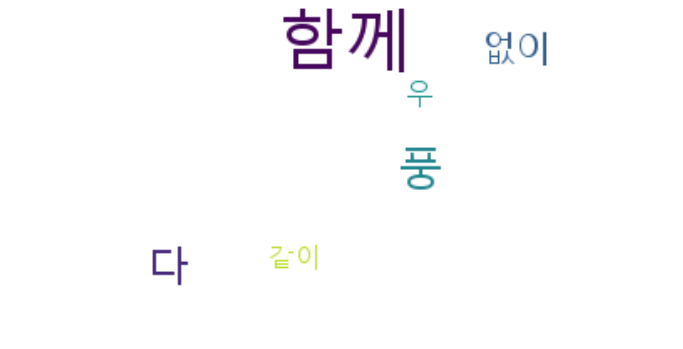

In [218]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(ad))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 동사

(-0.5, 399.5, 199.5, -0.5)

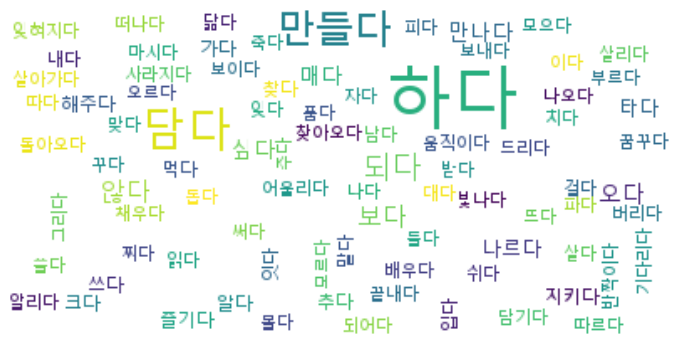

In [219]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(vb))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 기호

(-0.5, 399.5, 199.5, -0.5)

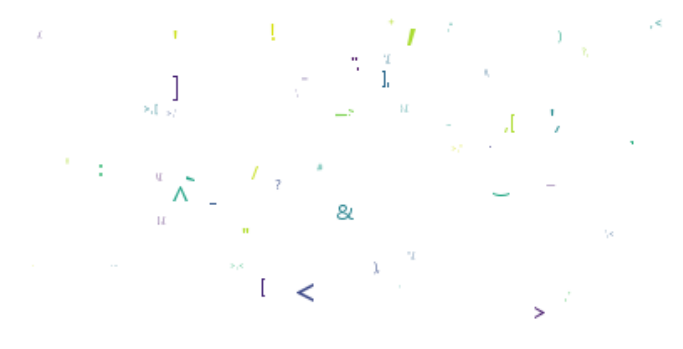

In [222]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(pc))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 명사 키워드

In [120]:
# 형태소 중 명사만

okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko))

53062


In [121]:
# 불용어 처리
stop_words = ["제", "월", "일", "조", "때", "그", "이", "바", "및", "안", "정", "위", "관", "수", "프로젝트", "내", "종", "속", "를", "것", "의"]
token_ko = [word for word in token_ko if word not in stop_words] 


# 워드 카운팅
ko = nltk.Text(token_ko)
data = ko.vocab().most_common(50)        # 가장 많이 등장한 단어 50개까지, 각각 등장한 갯수 카운팅
data

[('웹툰', 630),
 ('스케치업', 516),
 ('배경', 433),
 ('당신', 343),
 ('나', 322),
 ('뱃지', 298),
 ('집', 284),
 ('이야기', 280),
 ('우리', 276),
 ('세트', 243),
 ('고양이', 194),
 ('북', 190),
 ('여행', 175),
 ('여성', 175),
 ('판타지', 173),
 ('달력', 171),
 ('일상', 171),
 ('선물', 171),
 ('세상', 170),
 ('책', 165),
 ('향기', 159),
 ('꽃', 157),
 ('제작', 150),
 ('굿', 144),
 ('일러스트', 138),
 ('마음', 137),
 ('브러쉬', 135),
 ('한국', 135),
 ('사랑', 135),
 ('향수', 135),
 ('봄', 126),
 ('커피', 125),
 ('더', 123),
 ('첫', 123),
 ('향', 122),
 ('앵콜', 115),
 ('가지', 114),
 ('겨울', 104),
 ('티', 102),
 ('게임', 101),
 ('너', 99),
 ('사람', 99),
 ('키트', 98),
 ('기억', 98),
 ('여름', 97),
 ('카드', 93),
 ('시리즈', 93),
 ('시간', 92),
 ('가방', 92),
 ('디자인', 92)]

(-0.5, 399.5, 199.5, -0.5)

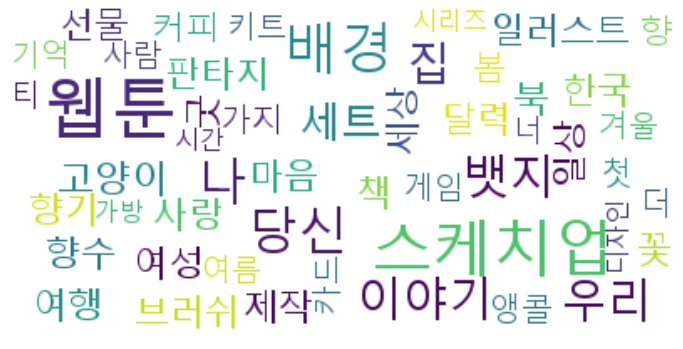

In [122]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

## 실패한 프로젝트도 하기

# 2. 데이터 셋 구분

In [46]:
token_pos2         # 빈도 수 상위 1000개까지만 사용

title_X= df["title"]
title_y= df["result"]

def frequency(doc):          # title
    compare_list = []

    for a in token_pos2:
        compare_list.append(a[0][0])
        return [doc.count(i) for i in compare_list]

match_cnt = [frequency(sentence) for sentence in title_X]       # 각 title 문장마다 상위 1000개 단어와 매칭되는 형태소? 갯수

match_int = []                 # [] 빼도록
for i in match_cnt:
    match_int.append(i[0])
    
df["match_cnt"] = pd.Series(match_int)                      # 기존 df에 추가

9561

In [55]:
# df를 훈련용과 테스트용으로 나누기

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold 

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)     # 4개 훈련용, 1개 테스트용

df["fold"] = -1        # 초기화

for idx, (t, v) in enumerate(kf.split(df, df["match_cnt"]), 1):
    print(t, v, len(v))
    df.loc[v, "fold"] = idx
    
# 왼쪽은 훈련용(인덱스), 오른쪽은 테스트용

[   0    1    2 ... 9557 9558 9559] [   7   10   13 ... 9552 9554 9560] 1913
[   0    1    3 ... 9558 9559 9560] [   2    5   11 ... 9538 9539 9548] 1912
[   2    4    5 ... 9558 9559 9560] [   0    1    3 ... 9543 9555 9556] 1912
[   0    1    2 ... 9556 9559 9560] [  12   27   33 ... 9547 9557 9558] 1912
[   0    1    2 ... 9557 9558 9560] [   4    6    8 ... 9551 9553 9559] 1912


In [56]:
df

,title,category,description,current_funding_amount,percentage,target_funding_amount,supporter,result,match_cnt,fold
index,,,,,,,,,,
0,웹툰과 일러스트를 위한 꽃브러쉬,웹툰 리소스,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,49651500,4965,500000,1659,1,0,3
1,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,웹툰 · 만화,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,347353000,267,500000,1712,1,0,3
2,꼬마마법사 레미 공식 한정판 굿즈,영화 · 비디오,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,74329000,247,500000,979,1,0,2
3,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,출판,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,12830500,366,500000,471,1,0,3
4,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",홈 · 리빙,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,7777000,777,500000,298,1,1,5
...,...,...,...,...,...,...,...,...,...,...
9556,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1730000,173,10000,27,1,0,3
9557,카프카 <변신> 초판본과 독서카드,출판,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1730000,173,10000,114,1,0,4
9558,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1730000,173,10000,54,1,0,4


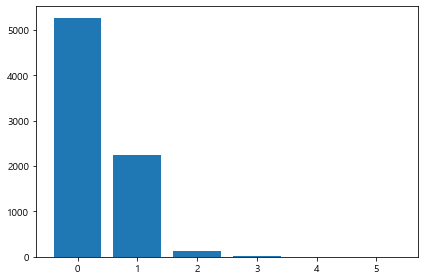

In [57]:
val_cnt = df[df["fold"] != 3 ]["match_cnt"].value_counts().sort_index()  # 잘 섞였는지 확인

plt.bar(range(len(val_cnt)), val_cnt.values)
plt.xticks(range(len(val_cnt)), val_cnt.index.values) 

plt.tight_layout()  
